In [1]:
#######################################################
#######################################################
##
## This notebook creates a violin plot 
## showing the reuse distributions 
## of samples in INSDC and GEO.
##
#######################################################
#######################################################

In [2]:
# load required modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [3]:
# import the data
dfSRA = pd.read_csv('sraReuseTable.csv')
dfGEO = pd.read_csv('geoReuseTable.csv')

In [4]:
## CLEAN THE DATA ##

# add headers
dfSRA.columns = ['accession', 'reuseCount']
dfGEO.columns = ['accession', 'reuseCount']

# add a tag column to separate by repository
dfSRA['tag'] = 'INSDC'
dfGEO['tag'] = 'GEO'

# merge both dataframes into one large dataframe
df = dfSRA.append(dfGEO, ignore_index=True)

In [5]:
df = df[df.reuseCount > 0]
df = df[df.reuseCount < 10]

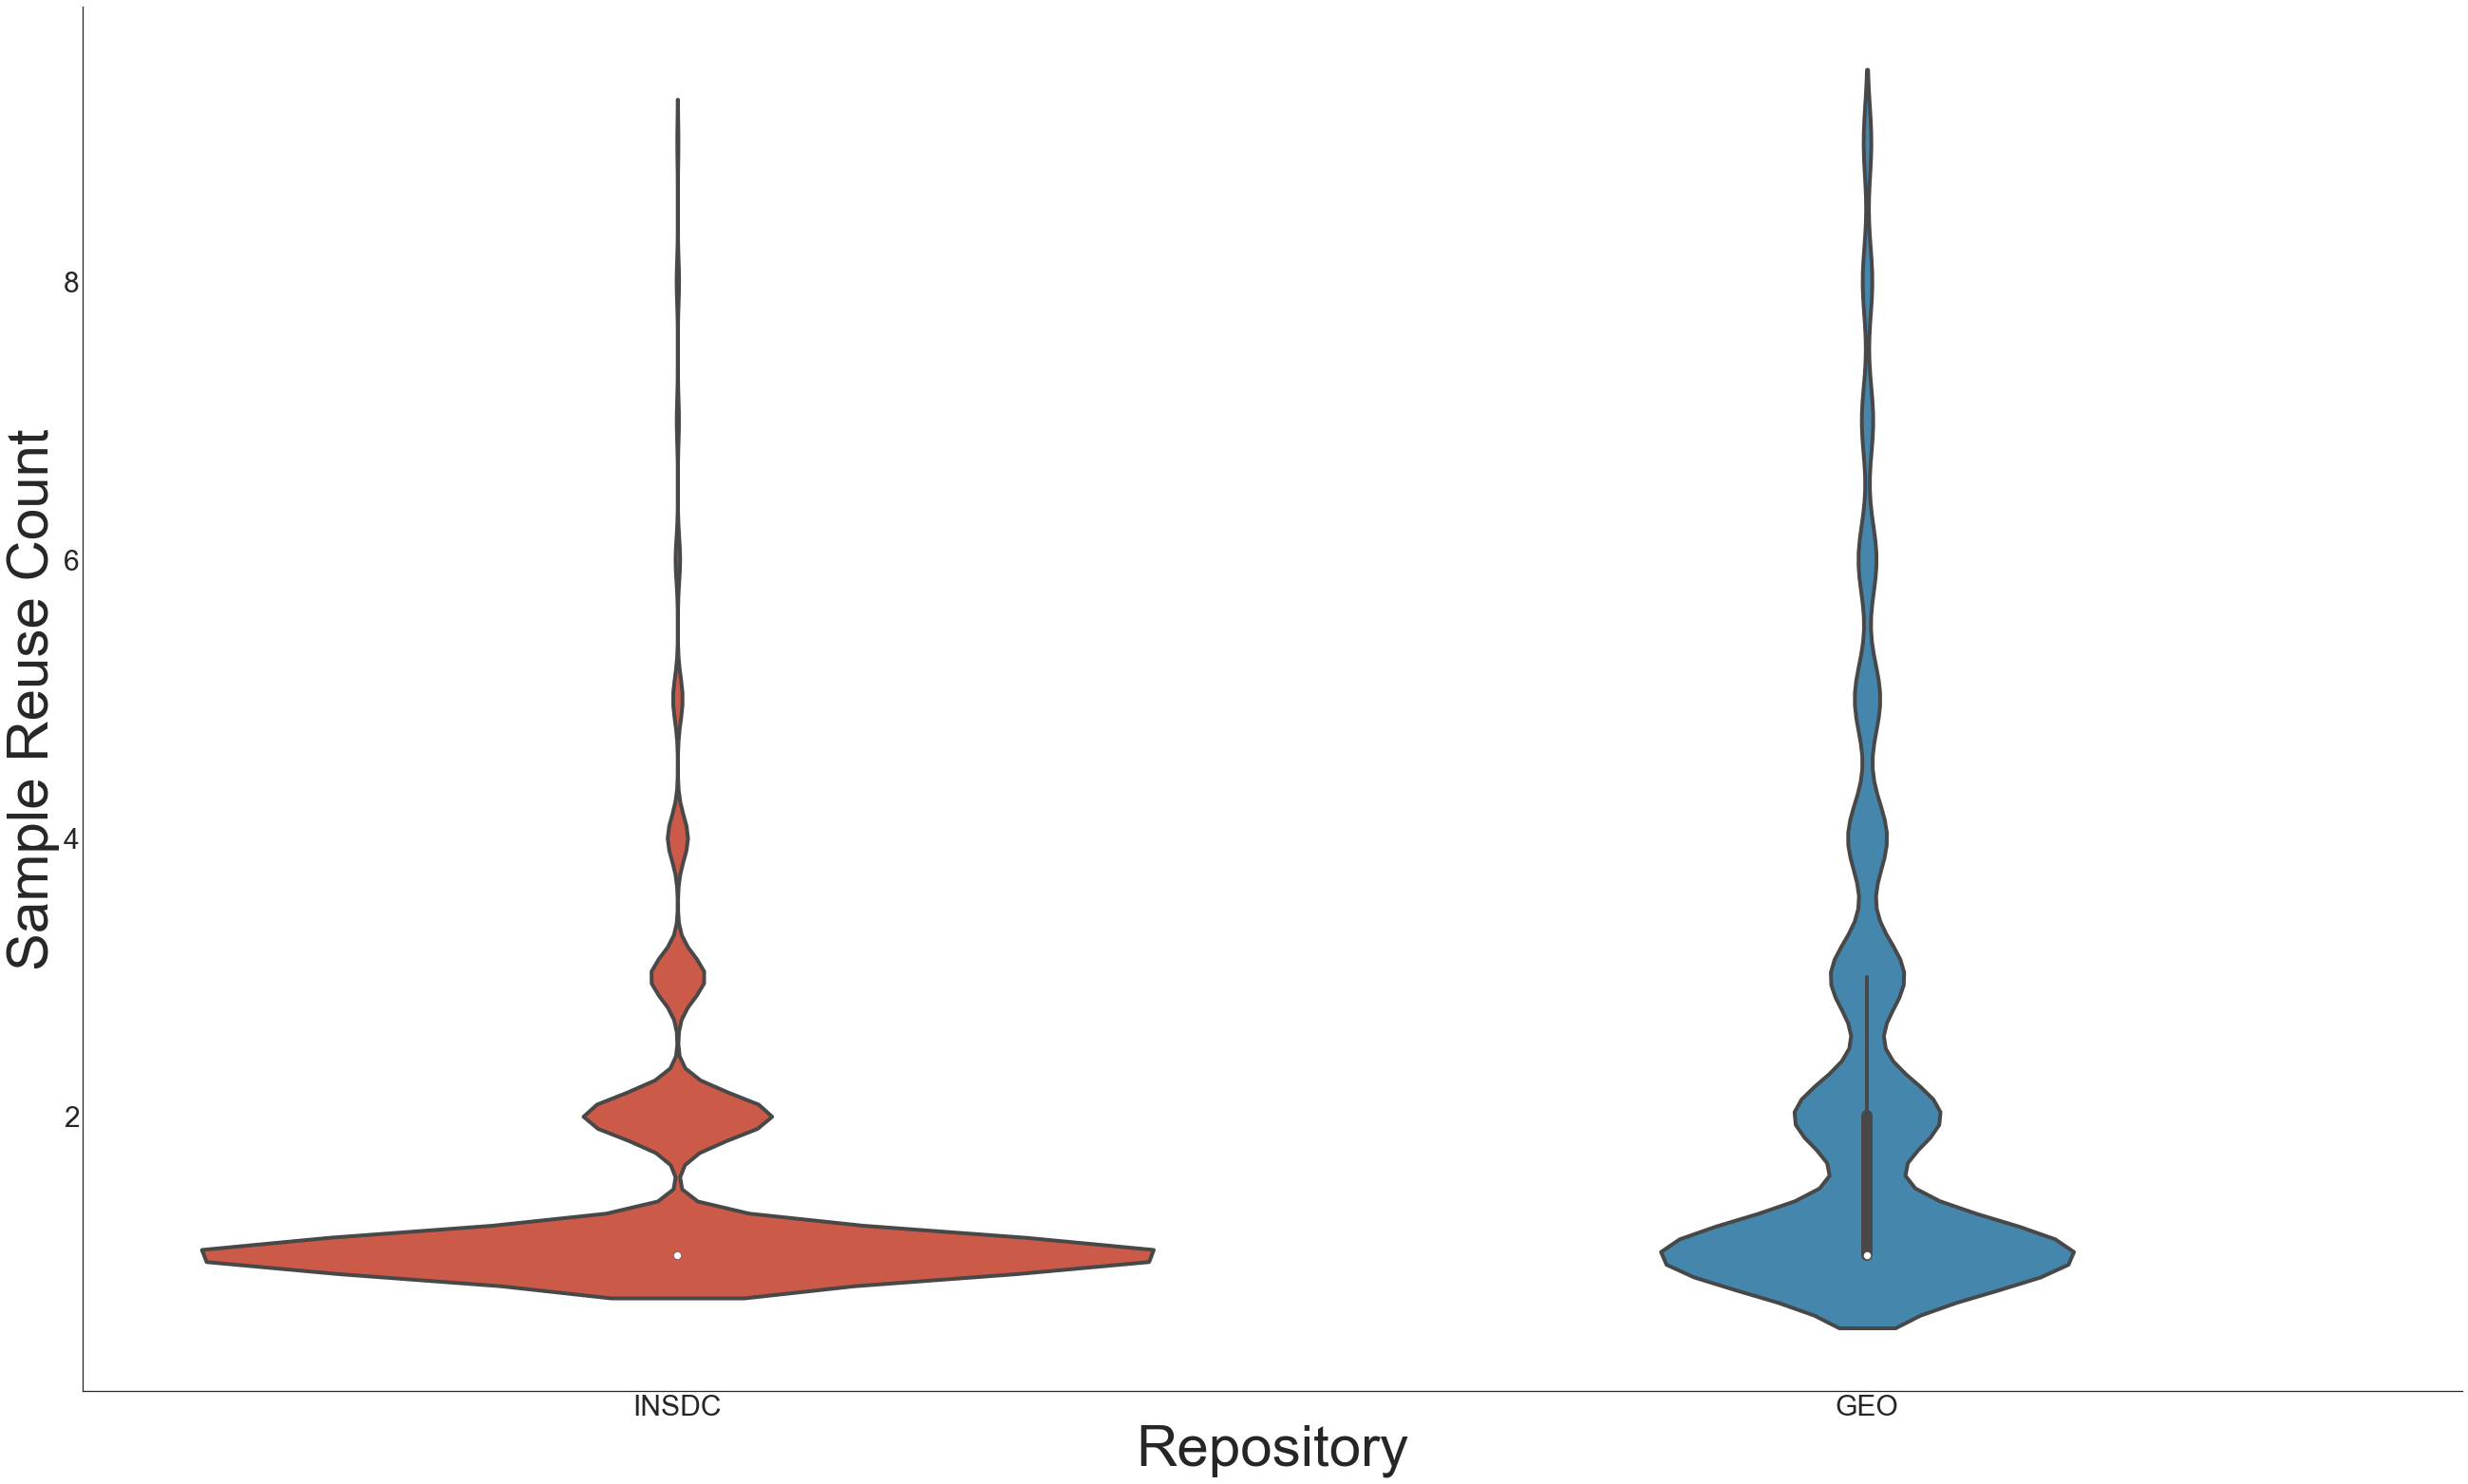

In [17]:
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))
ax = sns.violinplot(data = df, x = 'tag', y = 'reuseCount')
sns.despine()

ax.set_xlabel("Repository", fontsize=60)
ax.set_ylabel("Sample Reuse Count", fontsize=60)

ax.tick_params(labelsize=30)

fig = ax.get_figure()

fig.savefig('violinplot.png', dpi = 200, bbox_inches = 'tight', transparent = True)